# Data Prediction Los Angeles Crimes in 2014 and in 2015 #

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
import folium
import json
from branca.colormap import linear
from folium.plugins import MarkerCluster
from folium.plugins import Fullscreen
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

pd.options.mode.chained_assignment = None

**In the next cells we create a new dataframe containing the most important data of 2014 needed to make predictions. After created this dataset, we predict victim descent, victim sex and victim age by executing in parallel 5 different prediction algorithms:**
* **Ordinary Least Squares**; 
* **Regression Tree**;
* **Big Random Forest**;
* **Random Forest**;
* **Bagging**.

**After applied the algorithms we show the results in two type of graph, furthermore we will show the medium accuracy of each prediction. The 25% of the dataset will be used as test set and the remaining 75% as training set.**

In [3]:
LAcrimes = os.path.join('data', 'City of Los Angeles Crime_Data_From_2010_to_Present.csv')
df = pd.read_csv(LAcrimes,delimiter=';')
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Desc,MO Codes,...,Weapon Desc,Status Code,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,Location
0,100220871,11/13/2010,11/12/2010,1200,2,Rampart,271,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,JAMES M WOOD,LAKE,"(34.0539, -118.2799)"
1,100416450,10/14/2010,10/14/2010,1200,4,Hollenbeck,422,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,N BROADWAY,JOHNSON,"(0, 0)"
2,100506372,02/17/2010,02/09/2010,1600,5,Harbor,563,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,16TH,GAFFEY,"(33.7297, -118.2924)"
3,100516503,08/31/2010,08/30/2010,2300,5,Harbor,562,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,LELAND,14TH,"(33.7315, -118.3012)"
4,100516679,09/05/2010,09/04/2010,1330,5,Harbor,506,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,213TH,DENKER,"(33.8355, -118.3039)"
5,100100501,01/03/2010,01/02/2010,2100,1,Central,176,122,"RAPE, ATTEMPTED",400,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,"(34.0387, -118.2488)"
6,100100506,01/05/2010,01/04/2010,1650,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,NaN,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,"(34.048, -118.2577)"
7,100100508,01/08/2010,01/07/2010,2005,1,Central,182,330,BURGLARY FROM VEHICLE,344,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,"(34.0389, -118.2643)"
8,100100509,01/09/2010,01/08/2010,2100,1,Central,157,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",416,...,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,"(34.0435, -118.2427)"
9,100100510,01/09/2010,01/09/2010,230,1,Central,171,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,"(34.045, -118.264)"


In [4]:
df = df[~df['Date Occurred'].str.contains("2010|2011|2012|2013")]
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Desc,MO Codes,...,Weapon Desc,Status Code,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,Location
771150,140315532,07/12/2014,07/12/2014,500,3,Southwest,318,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,22ND,MAGNOLIA,"(34.036, -118.2865)"
771695,140406977,03/17/2014,03/16/2014,2200,4,Hollenbeck,453,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,BOYLE,BRIDGE,"(34.0523, -118.2174)"
789627,140106191,02/02/2014,02/02/2014,430,1,Central,156,350,"THEFT, PERSON",0305 0346,...,NaN,IC,Invest Cont,350.0,NaN,NaN,NaN,6TH,SAN JULIAN,"(34.0423, -118.2452)"
790103,140106193,02/02/2014,01/30/2014,2330,1,Central,171,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,OLYMPIC,GEORGIA,"(34.0459, -118.2657)"
790223,140106296,02/04/2014,02/03/2014,1830,1,Central,195,310,BURGLARY,344,...,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,16TH ST,SANTEE,"(34.0321, -118.2599)"
790402,140107528,02/21/2014,01/29/2014,2200,1,Central,171,354,THEFT OF IDENTITY,1822,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,900 W OLYMPIC BL,NaN,"(34.0454, -118.2657)"
790460,140112327,05/12/2014,05/02/2014,400,1,Central,192,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,1400 S GRAND AV,NaN,"(34.0372, -118.2654)"
790501,140112843,05/21/2014,05/20/2014,1900,1,Central,111,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,HILL,CESAR E CHAVEZ,"(34.0592, -118.2411)"
790780,140113180,05/26/2014,05/26/2014,1735,1,Central,182,664,"BUNCO, PETTY THEFT",0800 1402 0344,...,NaN,IC,Invest Cont,664.0,998.0,NaN,NaN,11TH,FLOWER,"(34.043, -118.2641)"
790961,140114407,06/12/2014,06/12/2014,750,1,Central,159,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,800 E 4TH ST,NaN,"(34.0433, -118.2377)"


In [5]:
df['Victim Sex'].value_counts()

M    116587
F    106169
X      3699
H         7
Name: Victim Sex, dtype: int64

In [6]:
df['Victim Sex'].fillna("U", inplace=True)

df = df[~df['Victim Sex'].str.contains("X|H")]

In [7]:
df['Victim Sex'].value_counts()

M    116587
F    106169
U     21299
Name: Victim Sex, dtype: int64

In [8]:
df[df['Victim Age'] < 0]['Victim Age']

989469   -1
990431   -1
993568   -1
993659   -1
993997   -1
994173   -1
994293   -1
994298   -1
994300   -1
994301   -1
994302   -1
994306   -1
994307   -1
994330   -1
994362   -1
994426   -1
994479   -1
994489   -1
994612   -1
994621   -1
994688   -1
994699   -1
994911   -2
Name: Victim Age, dtype: int64

In [9]:
df = df[~df['Victim Age'] < 0]

In [10]:
df[df['Victim Age'] < 0]['Victim Age']

Series([], Name: Victim Age, dtype: int64)

In [11]:
print (df[df['Time Occurred'] < 100])

         DR Number Date Reported Date Occurred  Time Occurred  Area ID  \
791362   140115001    06/22/2014    06/20/2014              1        1   
800856   130801740    01/01/2014    01/01/2014             40        8   
800871   140100529    01/11/2014    01/11/2014             30        1   
800872   140100530    01/11/2014    01/11/2014             30        1   
800904   140100587    02/07/2014    02/07/2014             20        1   
800906   140100598    02/09/2014    02/09/2014             30        1   
800941   140100689    03/15/2014    03/15/2014             35        1   
800967   140100759    04/02/2014    04/02/2014             20        1   
800972   140100773    04/10/2014    04/10/2014             30        1   
800985   140100802    04/18/2014    04/18/2014             35        1   
800990   140100808    04/20/2014    04/20/2014             15        1   
800991   140100809    04/21/2014    04/21/2014             15        1   
801001   140100828    04/27/2014    04

In [12]:
df['Time Occurred'] = df['Time Occurred'].astype(str)
df['Time Occurred'] = df['Time Occurred'].apply(lambda x: x.zfill(4))
df['Time Occurred']

771150     0500
771695     2200
789627     0430
790103     2330
790223     1830
790402     2200
790460     0400
790501     1900
790780     1735
790961     0750
791100     1530
791262     1515
791362     0001
791441     2300
791482     1530
792262     0830
792502     1750
792542     0200
792641     1544
792878     1545
792898     2149
793660     0230
793839     1530
793980     2200
794220     2230
795449     2100
795796     1700
795858     0330
797879     2100
798199     2130
           ... 
1048545    1000
1048546    1709
1048547    1455
1048548    0545
1048549    1300
1048550    2100
1048551    1500
1048552    1930
1048553    2345
1048554    1800
1048555    1600
1048556    2100
1048557    2300
1048558    2200
1048559    1700
1048560    0635
1048561    0800
1048562    1200
1048563    1500
1048564    0001
1048565    1800
1048566    2230
1048567    1600
1048568    0135
1048569    0800
1048570    2215
1048571    1340
1048572    0410
1048573    0001
1048574    1900
Name: Time Occurred, dty

In [13]:
df['Date-Time Occured'] = df["Date Occurred"].map(str) + " " + df["Time Occurred"].map(str)
df['Date-Time Occured']

771150     07/12/2014 0500
771695     03/16/2014 2200
789627     02/02/2014 0430
790103     01/30/2014 2330
790223     02/03/2014 1830
790402     01/29/2014 2200
790460     05/02/2014 0400
790501     05/20/2014 1900
790780     05/26/2014 1735
790961     06/12/2014 0750
791100     06/15/2014 1530
791262     06/15/2014 1515
791362     06/20/2014 0001
791441     06/29/2014 2300
791482     07/01/2014 1530
792262     08/09/2014 0830
792502     10/25/2014 1750
792542     10/30/2014 0200
792641     10/31/2014 1544
792878     11/17/2014 1545
792898     11/24/2014 2149
793660     07/16/2014 0230
793839     07/21/2014 1530
793980     08/07/2014 2200
794220     08/23/2014 2230
795449     08/27/2014 2100
795796     09/21/2014 1700
795858     09/25/2014 0330
797879     12/10/2014 2100
798199     12/10/2014 2130
                ...       
1048545    06/21/2015 1000
1048546    06/18/2015 1709
1048547    06/22/2015 1455
1048548    06/22/2015 0545
1048549    06/26/2015 1300
1048550    06/21/2015 2100
1

In [14]:
df['Date-Time Occured'] = pd.to_datetime(df['Date-Time Occured'])
df['Date-Time Occured']

771150    2014-07-12 05:00:00
771695    2014-03-16 22:00:00
789627    2014-02-02 04:30:00
790103    2014-01-30 23:30:00
790223    2014-02-03 18:30:00
790402    2014-01-29 22:00:00
790460    2014-05-02 04:00:00
790501    2014-05-20 19:00:00
790780    2014-05-26 17:35:00
790961    2014-06-12 07:50:00
791100    2014-06-15 15:30:00
791262    2014-06-15 15:15:00
791362    2014-06-20 00:01:00
791441    2014-06-29 23:00:00
791482    2014-07-01 15:30:00
792262    2014-08-09 08:30:00
792502    2014-10-25 17:50:00
792542    2014-10-30 02:00:00
792641    2014-10-31 15:44:00
792878    2014-11-17 15:45:00
792898    2014-11-24 21:49:00
793660    2014-07-16 02:30:00
793839    2014-07-21 15:30:00
793980    2014-08-07 22:00:00
794220    2014-08-23 22:30:00
795449    2014-08-27 21:00:00
795796    2014-09-21 17:00:00
795858    2014-09-25 03:30:00
797879    2014-12-10 21:00:00
798199    2014-12-10 21:30:00
                  ...        
1048545   2015-06-21 10:00:00
1048546   2015-06-18 17:09:00
1048547   

In [15]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'])

In [16]:
df[df['Location'] == "(0, 0)"]

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Desc,MO Codes,...,Status Code,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,Location,Date-Time Occured
793660,140214464,2014-07-20,07/16/2014,0230,2,Rampart,236,330,BURGLARY FROM VEHICLE,0344 1609 1307 0358,...,IC,Invest Cont,330.0,NaN,NaN,NaN,UNION,COURT,"(0, 0)",2014-07-16 02:30:00
801016,140100872,2014-05-10,05/10/2014,2155,1,Central,191,624,BATTERY - SIMPLE ASSAULT,416,...,AO,Adult Other,624.0,NaN,NaN,NaN,OLYMPIC BL,PICO BL,"(0, 0)",2014-05-10 21:55:00
801046,140100944,2014-06-08,06/02/2014,0500,1,Central,100,624,BATTERY - SIMPLE ASSAULT,0416 1202,...,IC,Invest Cont,624.0,NaN,NaN,NaN,2ND,UNKNOWN,"(0, 0)",2014-06-02 05:00:00
801424,140104546,2014-01-08,01/08/2014,1910,1,Central,182,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1300 0344,...,IC,Invest Cont,420.0,NaN,NaN,NaN,CHICK HEARN,PICO,"(0, 0)",2014-01-08 19:10:00
801460,140104671,2014-01-11,01/10/2014,2330,1,Central,159,330,BURGLARY FROM VEHICLE,344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,MATEO ST,PALMERO ST,"(0, 0)",2014-01-10 23:30:00
801532,140104925,2014-01-15,01/14/2014,1730,1,Central,138,940,EXTORTION,NaN,...,AO,Adult Other,940.0,NaN,NaN,NaN,3RD ST,BOYD ST,"(0, 0)",2014-01-14 17:30:00
801575,140105124,2014-01-16,01/16/2014,1930,1,Central,156,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1251 0443,...,IC,Invest Cont,930.0,NaN,NaN,NaN,5TH ST,JULIAN,"(0, 0)",2014-01-16 19:30:00
801723,140105615,2014-01-24,01/23/2014,1430,1,Central,105,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1602,...,IC,Invest Cont,341.0,NaN,NaN,NaN,CASANOVA,PARK,"(0, 0)",2014-01-23 14:30:00
801757,140105684,2014-01-26,01/26/2014,0300,1,Central,181,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),329,...,IC,Invest Cont,745.0,NaN,NaN,NaN,LA LIVE WY,W GEORGIA ST,"(0, 0)",2014-01-26 03:00:00
801779,140105741,2014-01-27,01/27/2014,1030,1,Central,111,330,BURGLARY FROM VEHICLE,0345 0344 1609 0321 0327,...,IC,Invest Cont,330.0,NaN,NaN,NaN,FORT MOORE,N HILL ST,"(0, 0)",2014-01-27 10:30:00


In [17]:
df = df[~df['Location'].isin(["(0, 0)"])]
df[df['Location'] == "(0, 0)"]

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Desc,MO Codes,...,Status Code,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,Location,Date-Time Occured


In [18]:
df['Location'] = df['Location'].map(lambda x: x.strip('()'))
df['Location']

771150      34.036, -118.2865
771695     34.0523, -118.2174
789627     34.0423, -118.2452
790103     34.0459, -118.2657
790223     34.0321, -118.2599
790402     34.0454, -118.2657
790460     34.0372, -118.2654
790501     34.0592, -118.2411
790780      34.043, -118.2641
790961     34.0433, -118.2377
791100     34.0481, -118.2507
791262     34.0478, -118.2502
791362      34.0454, -118.236
791441     34.0423, -118.2561
791482      34.0502, -118.254
792262     34.0487, -118.2588
792502     34.0453, -118.2499
792542      34.053, -118.2548
792641     34.0493, -118.2418
792878     34.0437, -118.2582
792898     34.0525, -118.2416
793839     34.0452, -118.2842
793980     34.0591, -118.2827
794220      34.0518, -118.271
795449     34.0507, -118.2776
795796     34.0685, -118.2775
795858     34.0897, -118.2846
797879      34.0853, -118.299
798199     34.0818, -118.2917
798260     34.0777, -118.2892
                  ...        
1048545    34.1005, -118.3205
1048546    34.1017, -118.3093
1048547   

In [19]:
app = df['Location'].str.split(",", expand = True)
df['Lat'] = app.loc[:,0]
df['Lon'] = app.loc[:,1]
del df['Location']
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Desc,MO Codes,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,Address,Cross Street,Date-Time Occured,Lat,Lon
771150,140315532,2014-07-12,07/12/2014,0500,3,Southwest,318,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,22ND,MAGNOLIA,2014-07-12 05:00:00,34.036,-118.2865
771695,140406977,2014-03-17,03/16/2014,2200,4,Hollenbeck,453,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,BOYLE,BRIDGE,2014-03-16 22:00:00,34.0523,-118.2174
789627,140106191,2014-02-02,02/02/2014,0430,1,Central,156,350,"THEFT, PERSON",0305 0346,...,Invest Cont,350.0,NaN,NaN,NaN,6TH,SAN JULIAN,2014-02-02 04:30:00,34.0423,-118.2452
790103,140106193,2014-02-02,01/30/2014,2330,1,Central,171,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,OLYMPIC,GEORGIA,2014-01-30 23:30:00,34.0459,-118.2657
790223,140106296,2014-02-04,02/03/2014,1830,1,Central,195,310,BURGLARY,344,...,Invest Cont,310.0,NaN,NaN,NaN,16TH ST,SANTEE,2014-02-03 18:30:00,34.0321,-118.2599
790402,140107528,2014-02-21,01/29/2014,2200,1,Central,171,354,THEFT OF IDENTITY,1822,...,Invest Cont,354.0,NaN,NaN,NaN,900 W OLYMPIC BL,NaN,2014-01-29 22:00:00,34.0454,-118.2657
790460,140112327,2014-05-12,05/02/2014,0400,1,Central,192,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,1400 S GRAND AV,NaN,2014-05-02 04:00:00,34.0372,-118.2654
790501,140112843,2014-05-21,05/20/2014,1900,1,Central,111,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,HILL,CESAR E CHAVEZ,2014-05-20 19:00:00,34.0592,-118.2411
790780,140113180,2014-05-26,05/26/2014,1735,1,Central,182,664,"BUNCO, PETTY THEFT",0800 1402 0344,...,Invest Cont,664.0,998.0,NaN,NaN,11TH,FLOWER,2014-05-26 17:35:00,34.043,-118.2641
790961,140114407,2014-06-12,06/12/2014,0750,1,Central,159,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,800 E 4TH ST,NaN,2014-06-12 07:50:00,34.0433,-118.2377


In [20]:
df['Victim Descent'].isnull().sum()

21071

In [21]:
df['Victim Descent'].fillna("X", inplace=True)

In [22]:
df['Victim Descent'].isnull().sum()

0

In [23]:
df2014 = df[df['Date Occurred'].str.contains("2014")]
df2015 = df[df['Date Occurred'].str.contains("2015")]

In [24]:
del df['Date Occurred']
del df['Time Occurred']

del df2014['Date Occurred']
del df2014['Time Occurred']
del df2015['Date Occurred']
del df2015['Time Occurred']

In [25]:
len(df2014.index)

190330

In [26]:
len(df2015.index)

51678

In [92]:
descent_dict_2 = {'A': 1,'B' : 2,'C' : 3,'D' : 4,'F' : 5,
                'G' : 6,'H' : 7,'I' : 8, 
                'J' : 9,'K' : 10,'L' : 11,'O' : 12,'P' : 13, 
                'S' : 14,'U' : 15 ,'V' : 16,'W' : 17,'X' : 18,'Z' : 19}

In [93]:
sex_dict = {'M': 1,'F' : 2,'U' : 3}

## Predictions in 2014 ##

### Victim Descent prediction ###

In [120]:
df2_2014 = pd.DataFrame(index=df2014.index)
df2_2014['Lat'] = df2014['Lat']
df2_2014['Lon'] = df2014['Lon']
df2_2014['Lat'] = pd.to_numeric(df2_2014['Lat'])
df2_2014['Lon'] = pd.to_numeric(df2_2014['Lon'])
df2_2014['Date-Time Occured'] = df2014['Date-Time Occured']
df2_2014['Time'] = df2014['Date-Time Occured'].dt.hour + (df2014['Date-Time Occured'].dt.minute/60) + (df2014['Date-Time Occured'].dt.second/3600)
df2_2014['Weekday'] = df2_2014['Date-Time Occured'].dt.dayofweek
df2_2014['Area ID'] = df2014['Area ID']
df2_2014['Crime Code'] = df2014['Crime Code']
df2_2014['Victim Descent'] = df2014['Victim Descent']
df2_2014['Victim Age'] = df2014['Victim Age']
df2_2014['Victim Sex'] = df2014['Victim Sex']
del df2_2014['Date-Time Occured']
df2_2014

,Lat,Lon,Time,Weekday,Area ID,Crime Code,Victim Descent,Victim Age,Victim Sex
771150,34.0360,-118.2865,5.000000,5,3,510,X,113,U
771695,34.0523,-118.2174,22.000000,6,4,510,X,113,U
789627,34.0423,-118.2452,4.500000,6,1,350,B,49,M
790103,34.0459,-118.2657,23.500000,3,1,510,X,113,U
790223,34.0321,-118.2599,18.500000,0,1,310,H,39,M
790402,34.0454,-118.2657,22.000000,2,1,354,W,38,M
790460,34.0372,-118.2654,4.000000,4,1,510,X,113,U
790501,34.0592,-118.2411,19.000000,1,1,510,X,113,U
790780,34.0430,-118.2641,17.583333,0,1,664,W,61,M
790961,34.0433,-118.2377,7.833333,3,1,510,X,113,U


In [121]:
df2_2014 = df2_2014.replace({'Victim Descent': descent_dict_2})
df2_2014 = df2_2014.replace({'Victim Sex': sex_dict})
df2_2014

,Lat,Lon,Time,Weekday,Area ID,Crime Code,Victim Descent,Victim Age,Victim Sex
771150,34.0360,-118.2865,5.000000,5,3,510,18,113,3
771695,34.0523,-118.2174,22.000000,6,4,510,18,113,3
789627,34.0423,-118.2452,4.500000,6,1,350,2,49,1
790103,34.0459,-118.2657,23.500000,3,1,510,18,113,3
790223,34.0321,-118.2599,18.500000,0,1,310,7,39,1
790402,34.0454,-118.2657,22.000000,2,1,354,17,38,1
790460,34.0372,-118.2654,4.000000,4,1,510,18,113,3
790501,34.0592,-118.2411,19.000000,1,1,510,18,113,3
790780,34.0430,-118.2641,17.583333,0,1,664,17,61,1
790961,34.0433,-118.2377,7.833333,3,1,510,18,113,3


In [122]:
df2_2014.dtypes

Lat               float64
Lon               float64
Time              float64
Weekday             int64
Area ID             int64
Crime Code          int64
Victim Descent      int64
Victim Age          int64
Victim Sex          int64
dtype: object

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
from pandas import DataFrame, get_dummies
mtl.rcParams['agg.path.chunksize'] = 10000

__We are running the five algorithm in parallel to see the best score__
The algorithms are -
1-Ordinary Least Square Method
2- Regression Tree
3- Big Random Forest
4- Random Forest
5- Bagging

In [125]:
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [126]:
from sklearn.model_selection import train_test_split
[_.shape for _ in  train_test_split(df2_2014.drop("Victim Descent", axis=1), 
                                    df2_2014["Victim Descent"], test_size=0.25)]

[(142747, 8), (47583, 8), (142747,), (47583,)]

In [127]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(df2_2014.drop("Victim Descent", axis=1), 
                         df2_2014["Victim Descent"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pandas.Series(actuals)
experiments["Predictions"] = list(map(pandas.Series, experiments["Predictions"]))

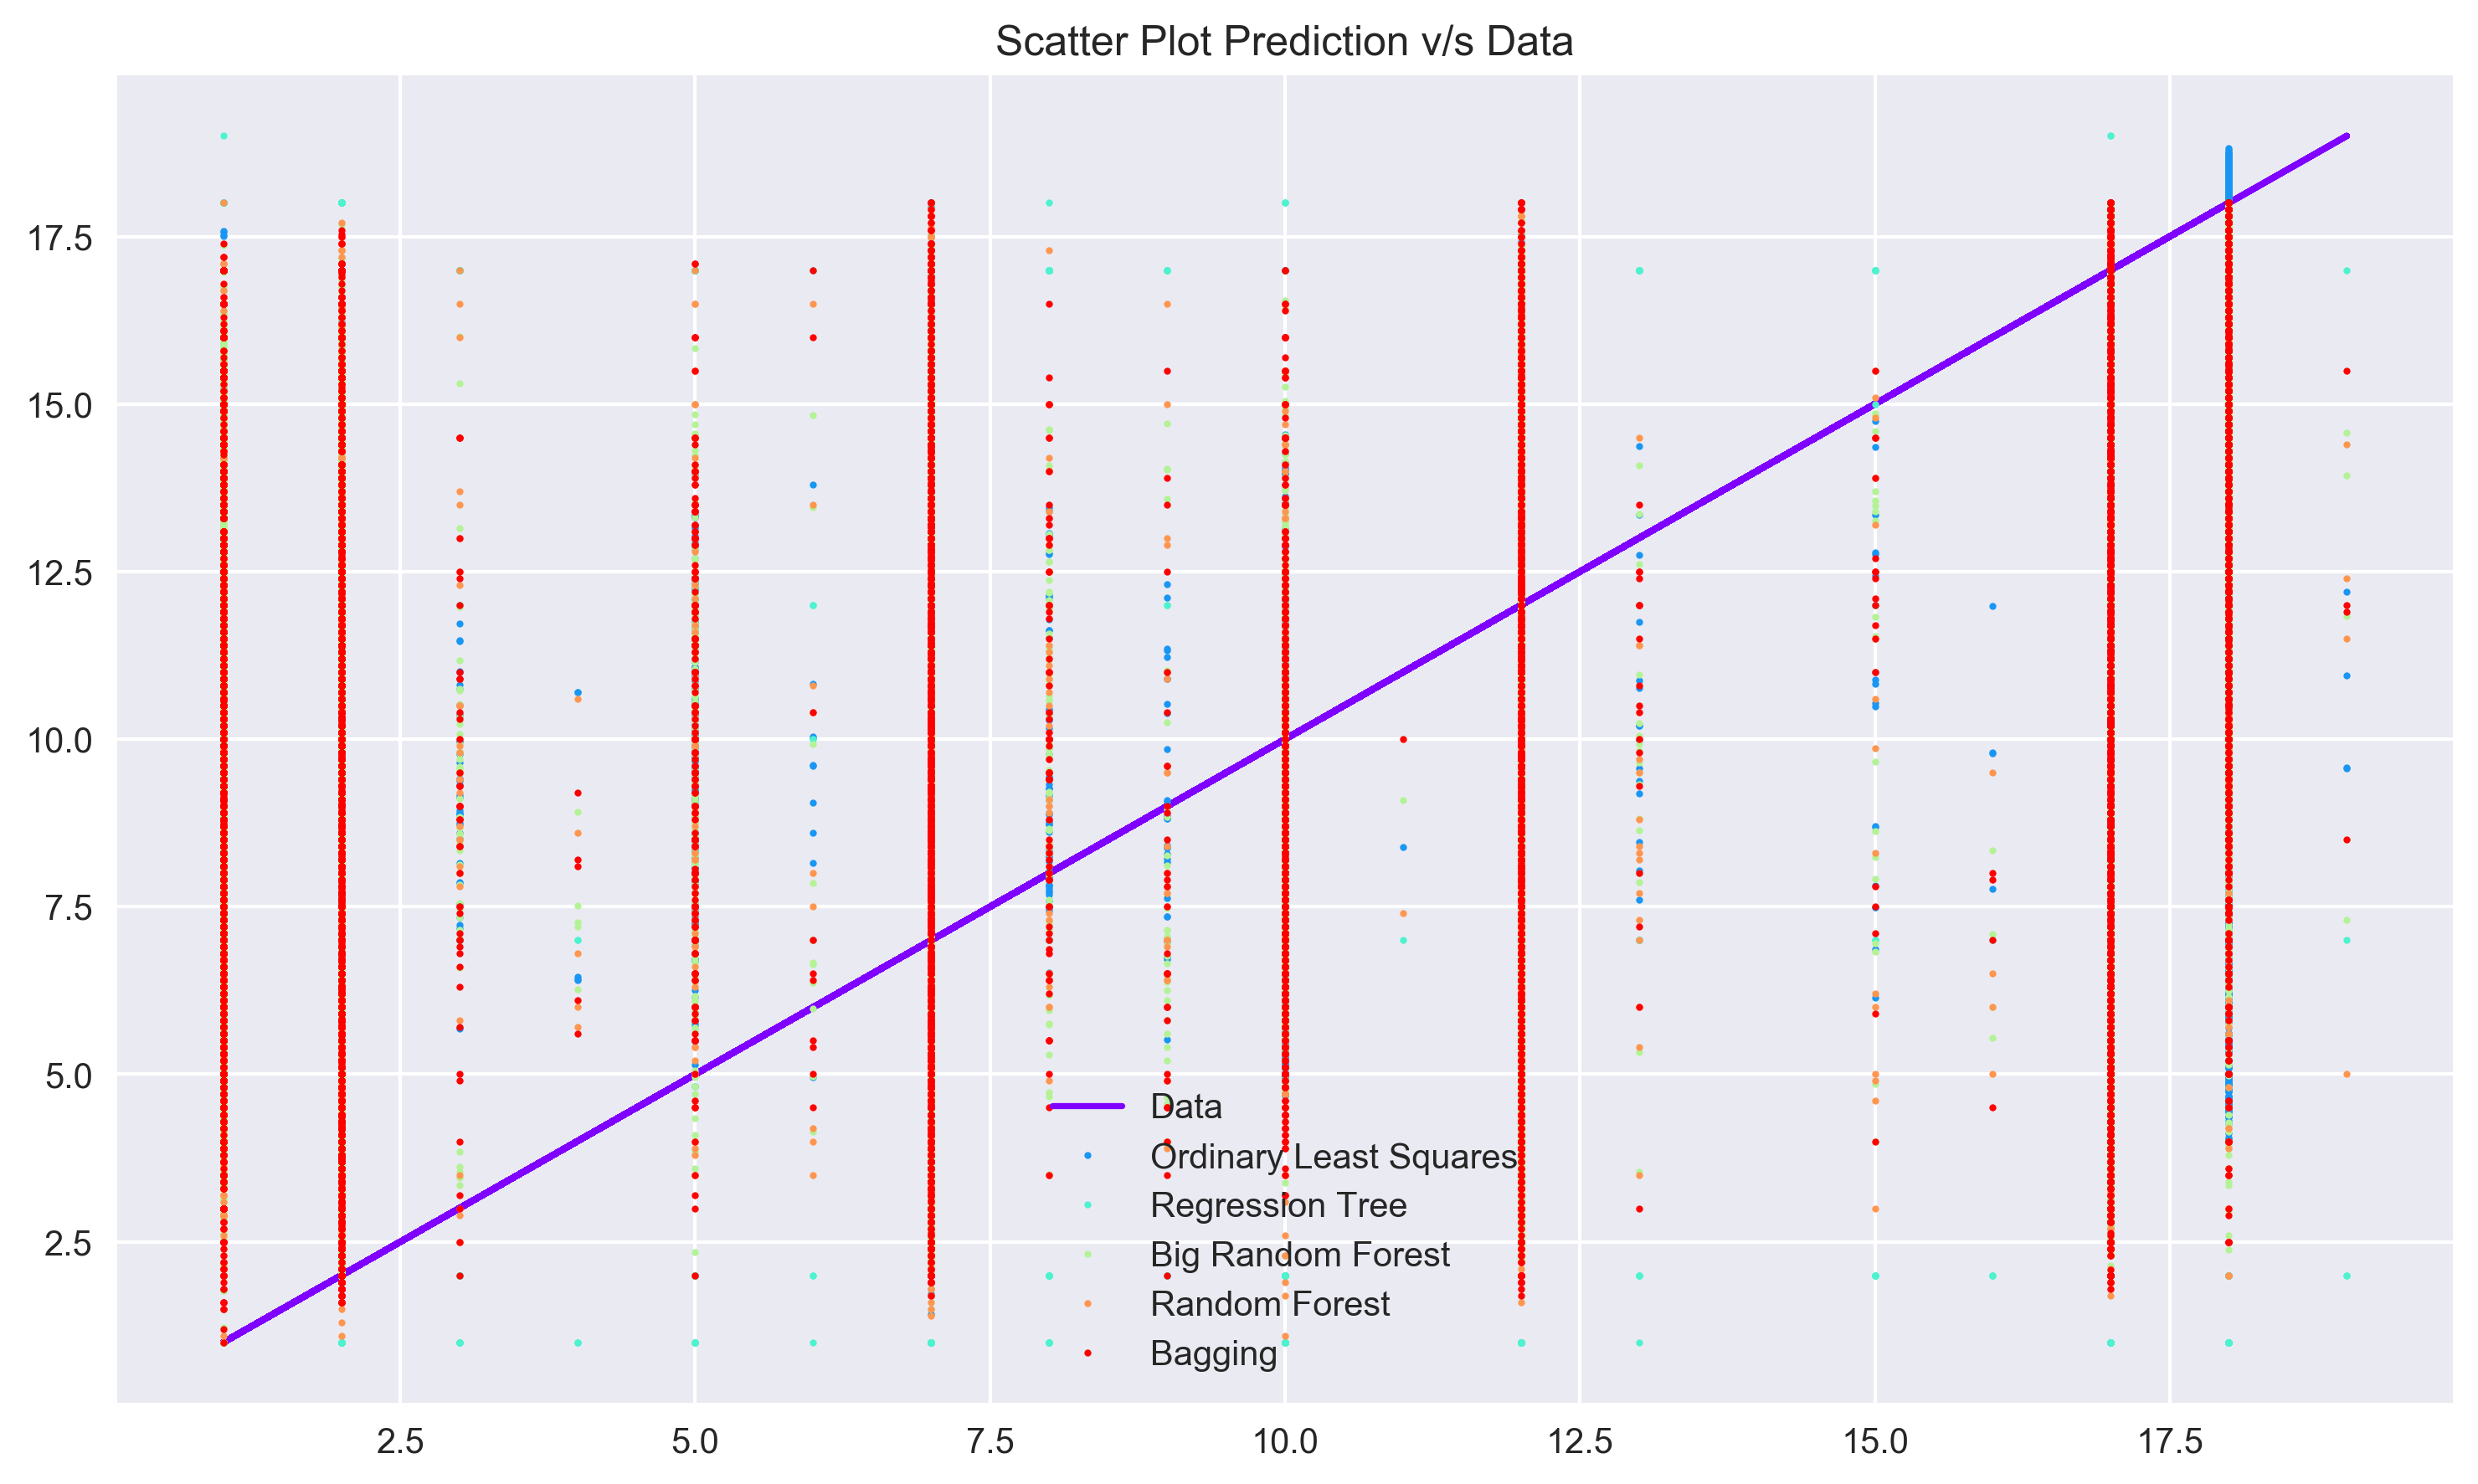

In [129]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
plt.figure(figsize=(12,7),dpi=300)
plt.plot(actuals,actuals,c=next(color),markersize=2,label='Data')
for _, row in DataFrame(experiments).iterrows():
    plt.plot(actuals, row["Predictions"],'o',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Scatter Plot Prediction v/s Data')
plt.grid(True)
plt.legend()
plt.show()

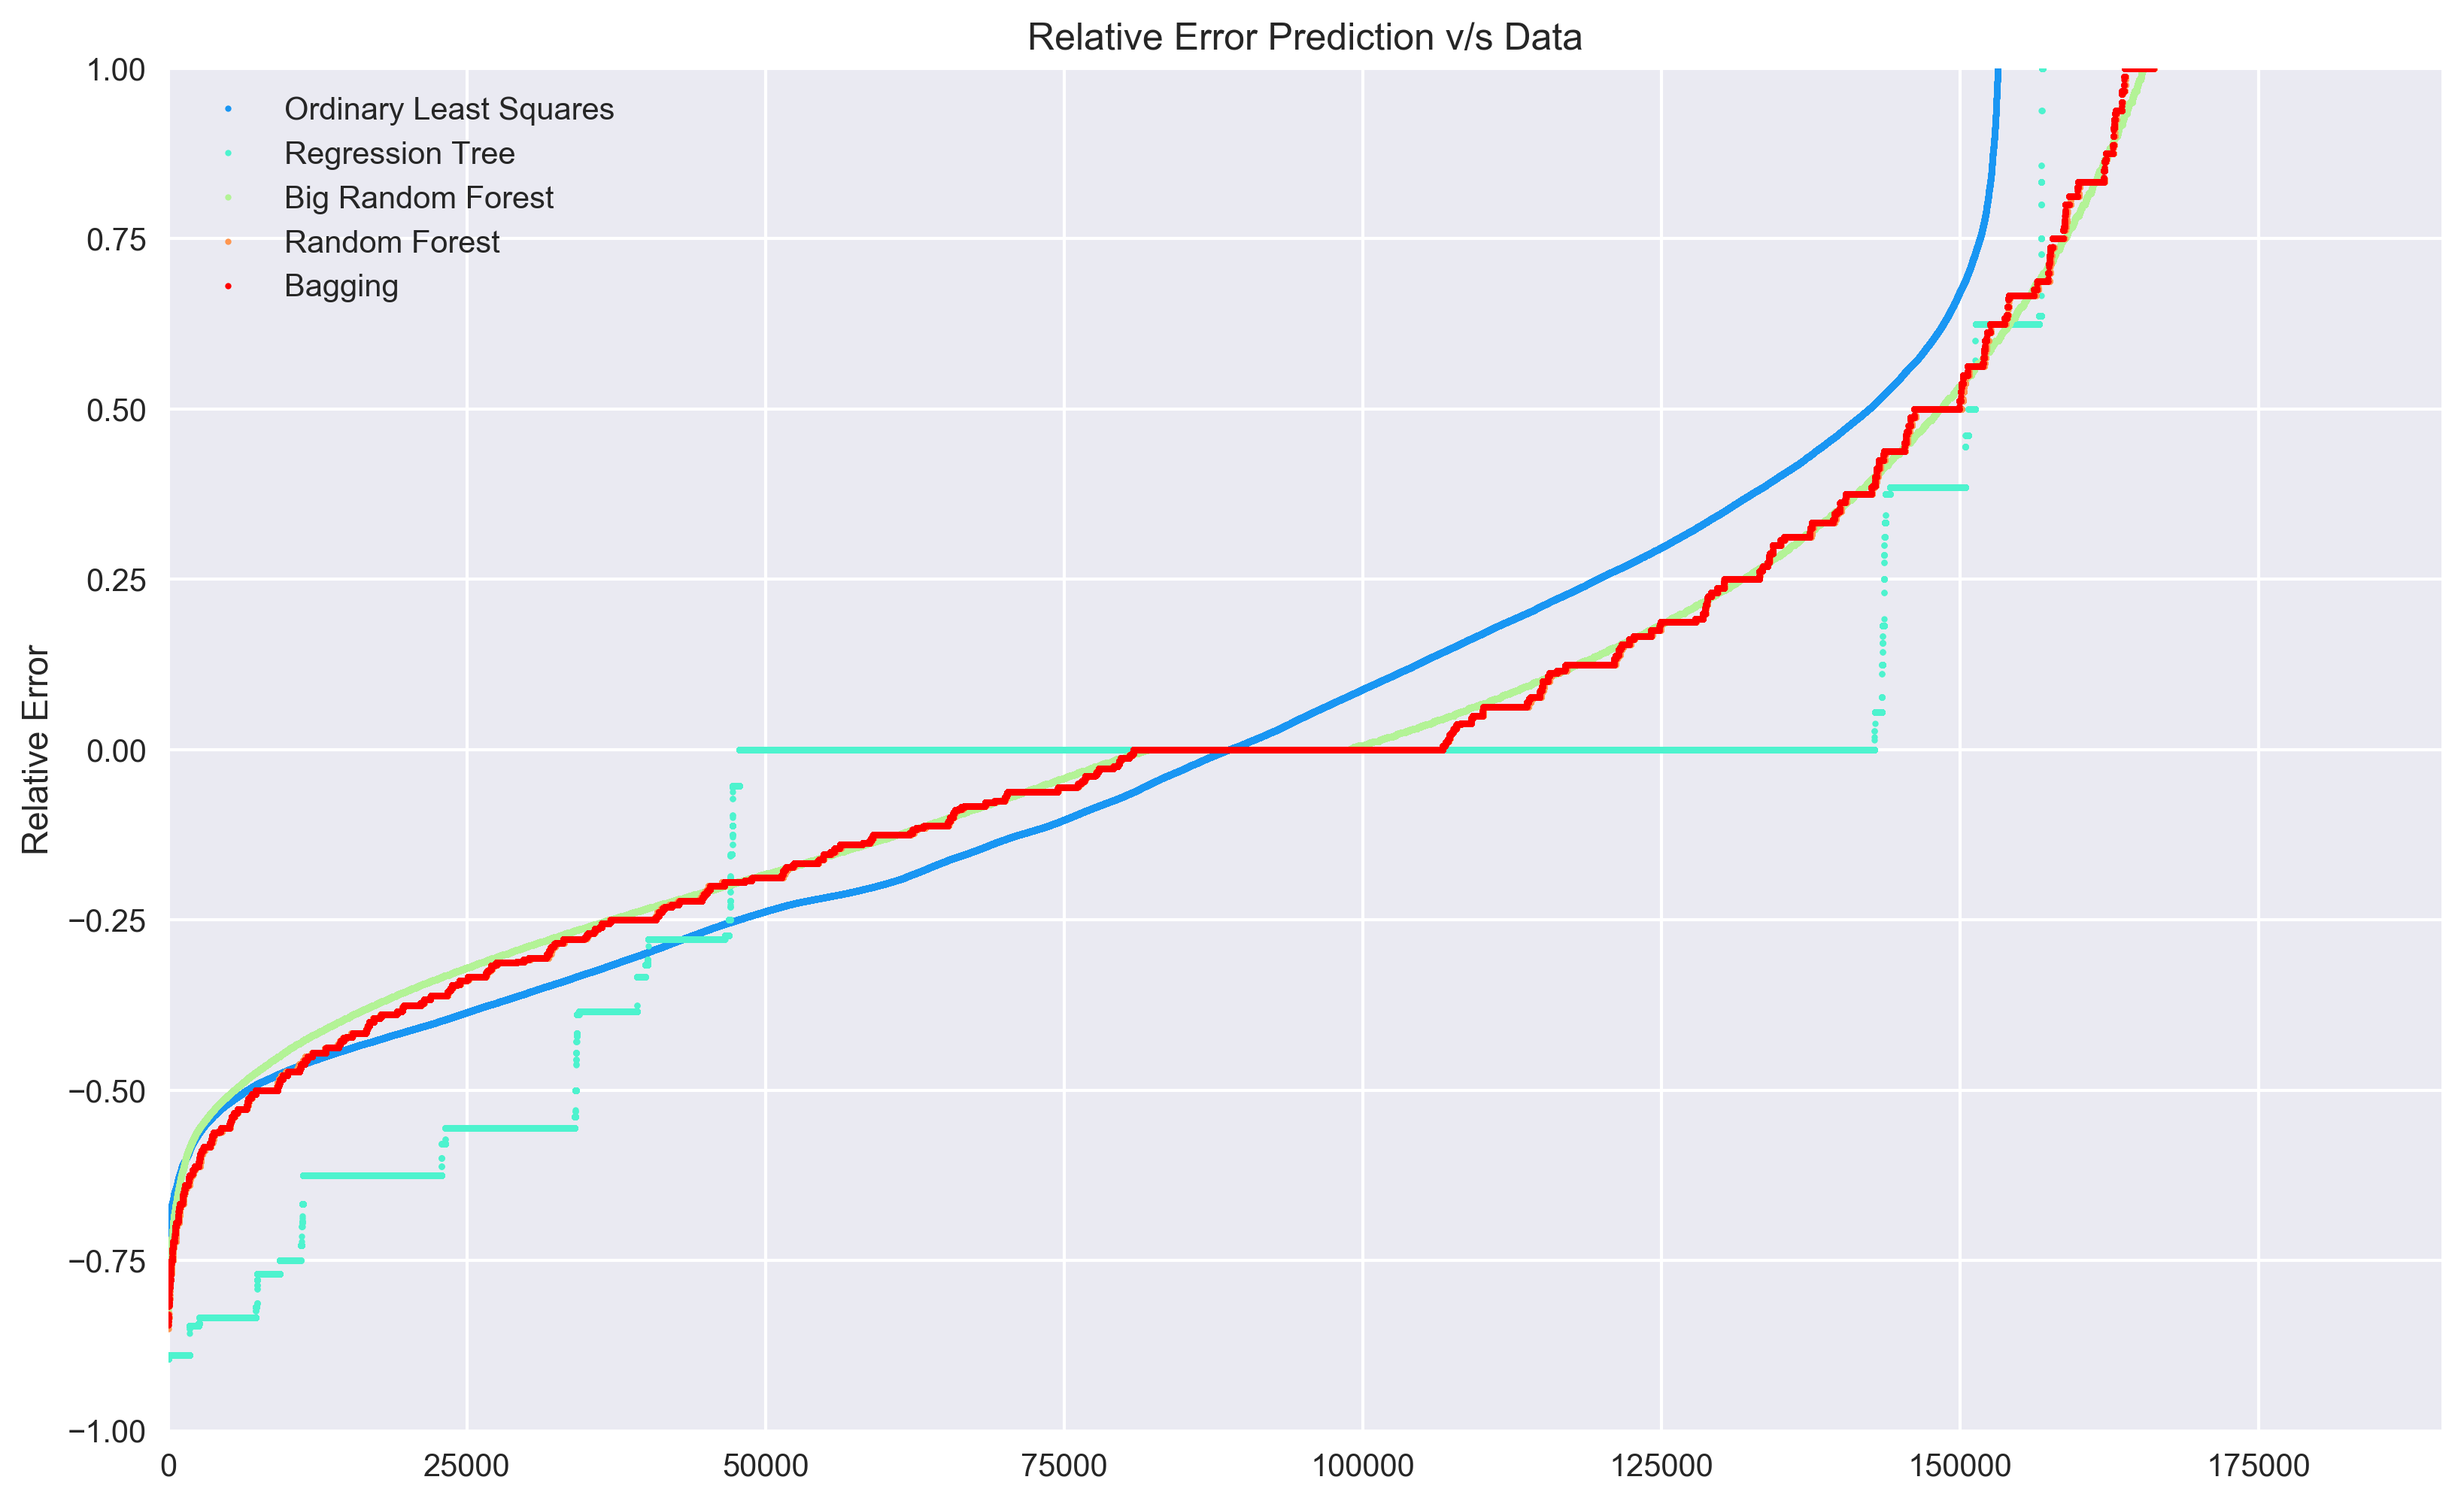

In [130]:
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
next(color)
plt.figure(figsize=(13,8),dpi=300)
for index, row in DataFrame(experiments).iterrows():
    relative_error = (row["Predictions"] - actuals) / (1 + abs(actuals))
    plt.plot(np.sort(relative_error),'o',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Relative Error Prediction v/s Data')
plt.ylabel('Relative Error')
plt.grid(True)
plt.legend()
plt.axis([0,len(actuals),-1,1])
plt.show()

In [131]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=df2_2014['Victim Descent'], 
                                        X=df2_2014.drop("Victim Descent", axis=1),
                                        cv=5).mean())

In [132]:
DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

,Results
Algorithm,
Ordinary Least Squares,0.078802
Regression Tree,-0.294785
Big Random Forest,0.352231
Random Forest,0.286031
Bagging,0.296796


__Best Algorithm to predict the victim Descent is Big Random Forest__

### Victim Sex prediction ###

In [133]:
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [134]:
from sklearn.model_selection import train_test_split
[_.shape for _ in  train_test_split(df2_2014.drop("Victim Sex", axis=1), 
                                    df2_2014["Victim Sex"], test_size=0.25)]

[(142747, 8), (47583, 8), (142747,), (47583,)]

In [135]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(df2_2014.drop("Victim Sex", axis=1), 
                         df2_2014["Victim Sex"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pandas.Series(actuals)
experiments["Predictions"] = list(map(pandas.Series, experiments["Predictions"]))

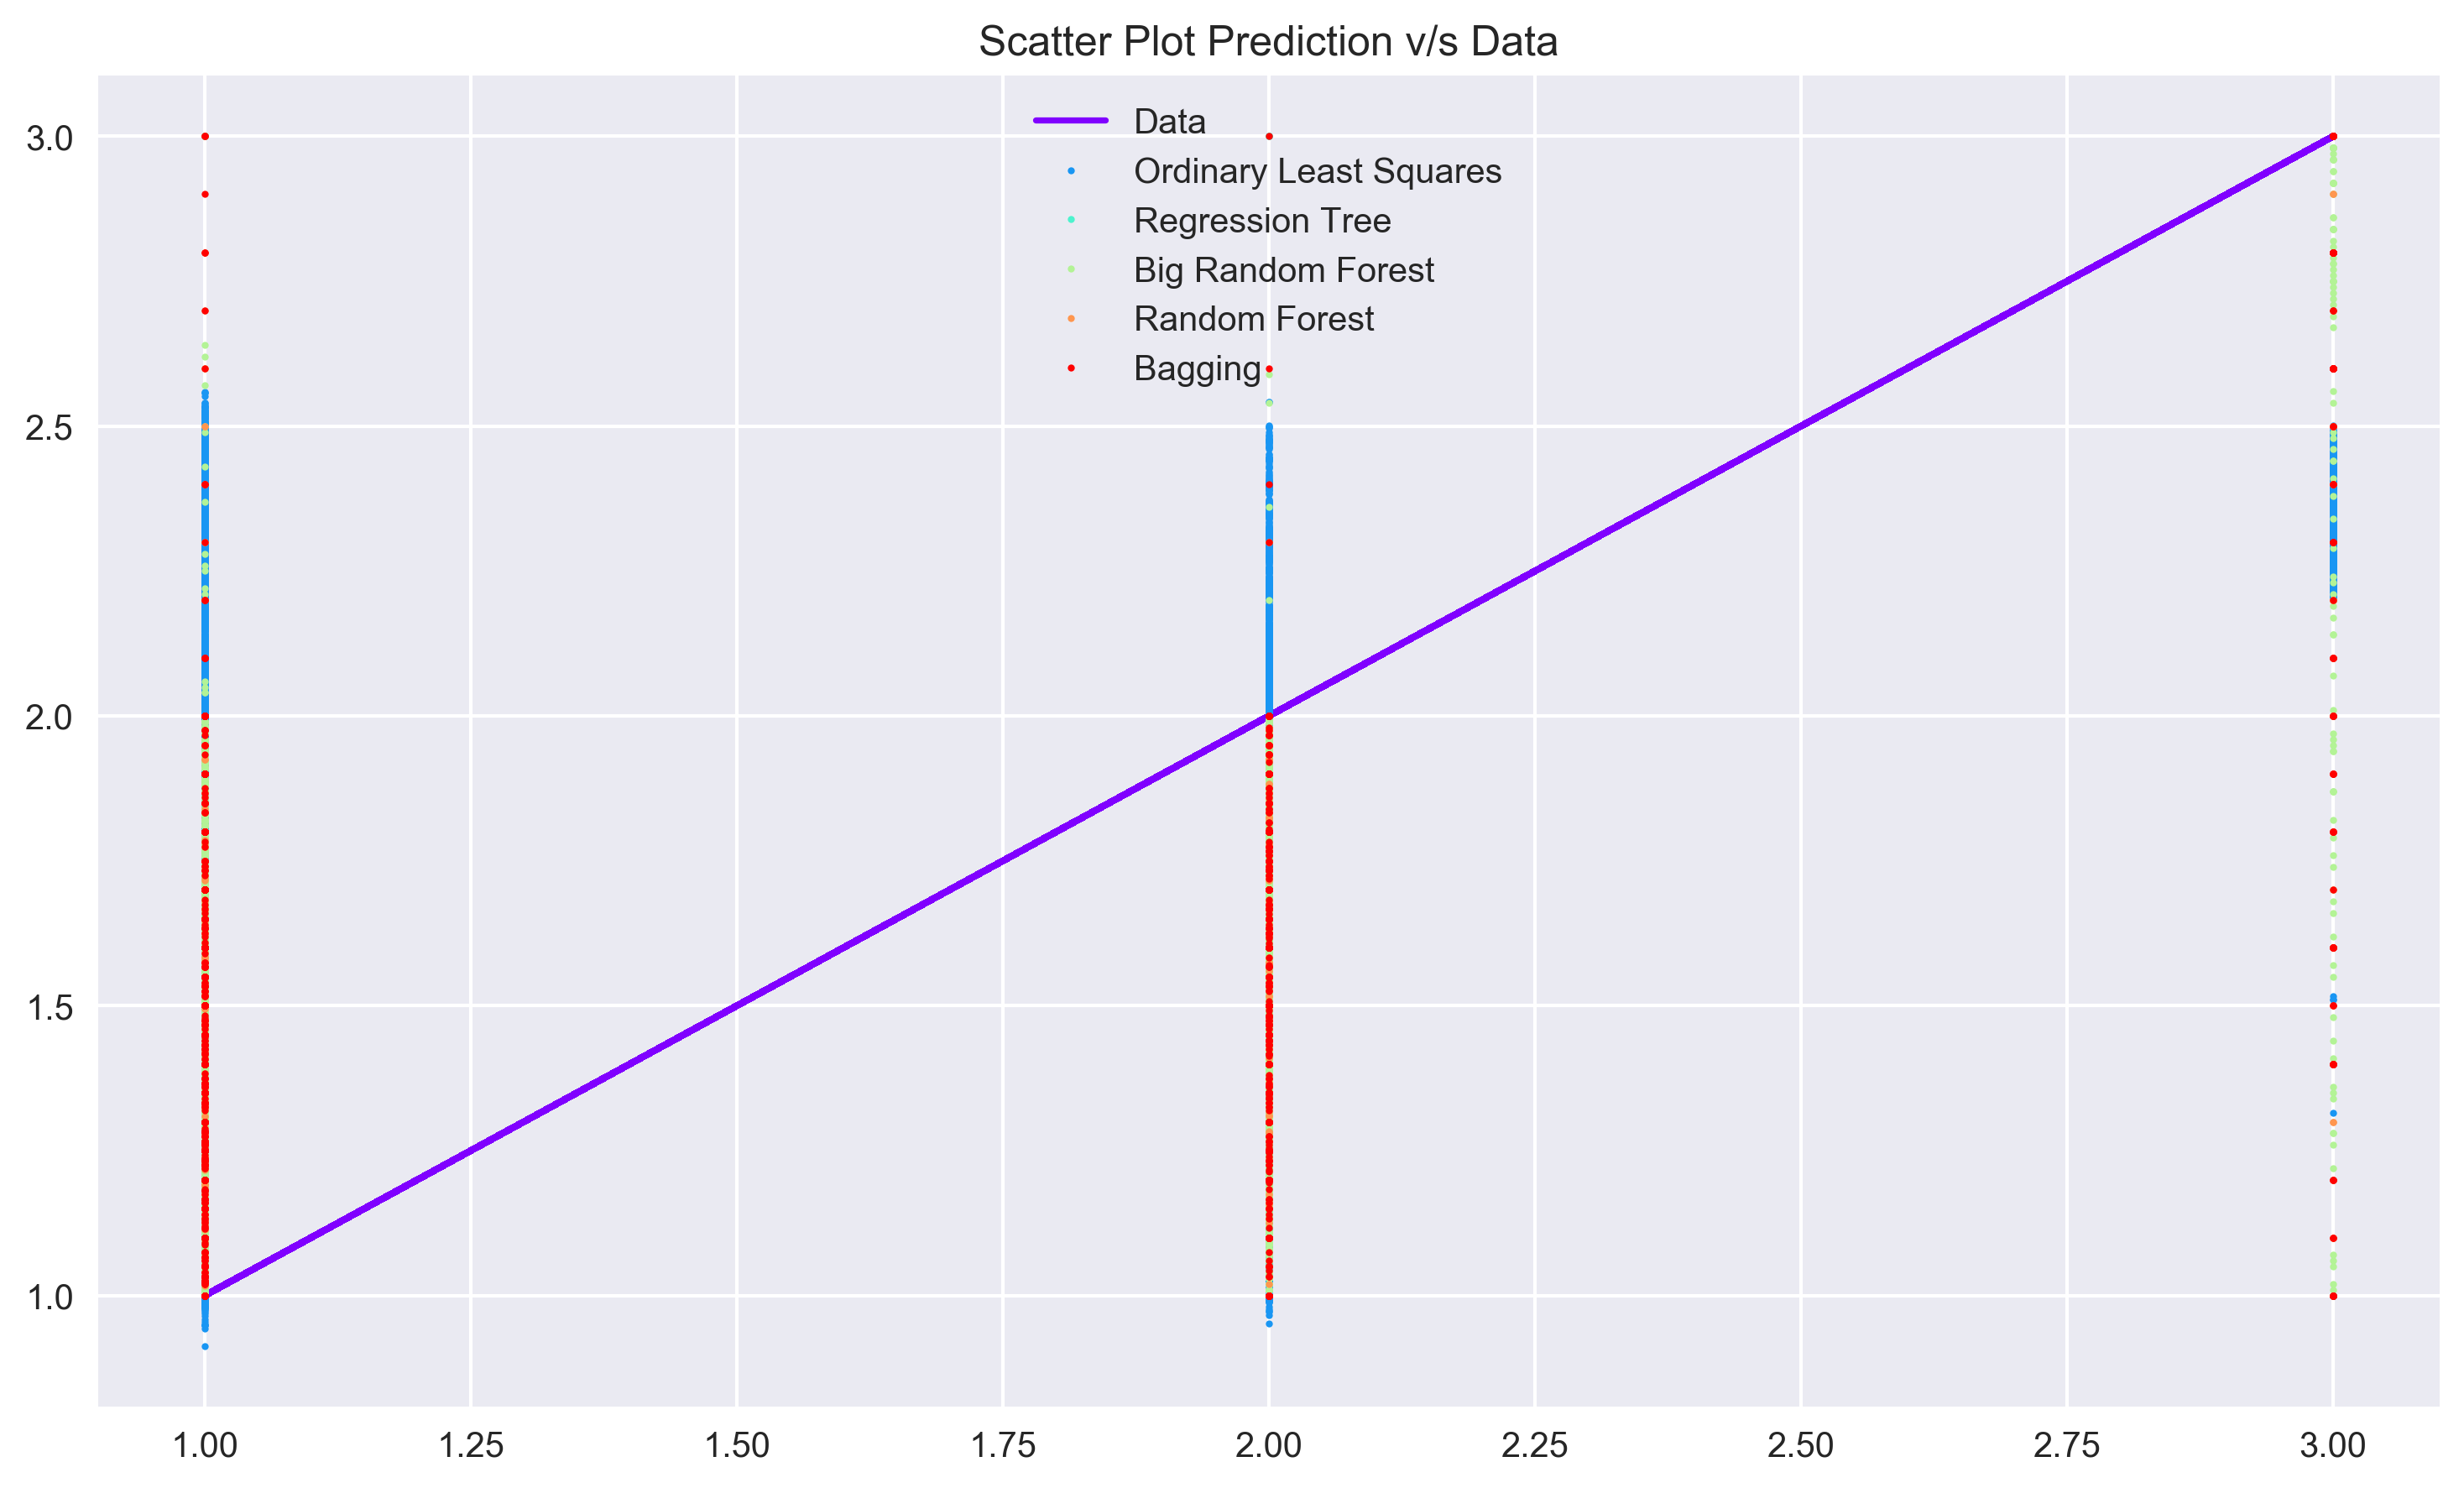

In [136]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
plt.figure(figsize=(12,7),dpi=300)
plt.plot(actuals,actuals,c=next(color),markersize=2,label='Data')
for _, row in DataFrame(experiments).iterrows():
    plt.plot(actuals, row["Predictions"],'o',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Scatter Plot Prediction v/s Data')
plt.grid(True)
plt.legend()
plt.show()

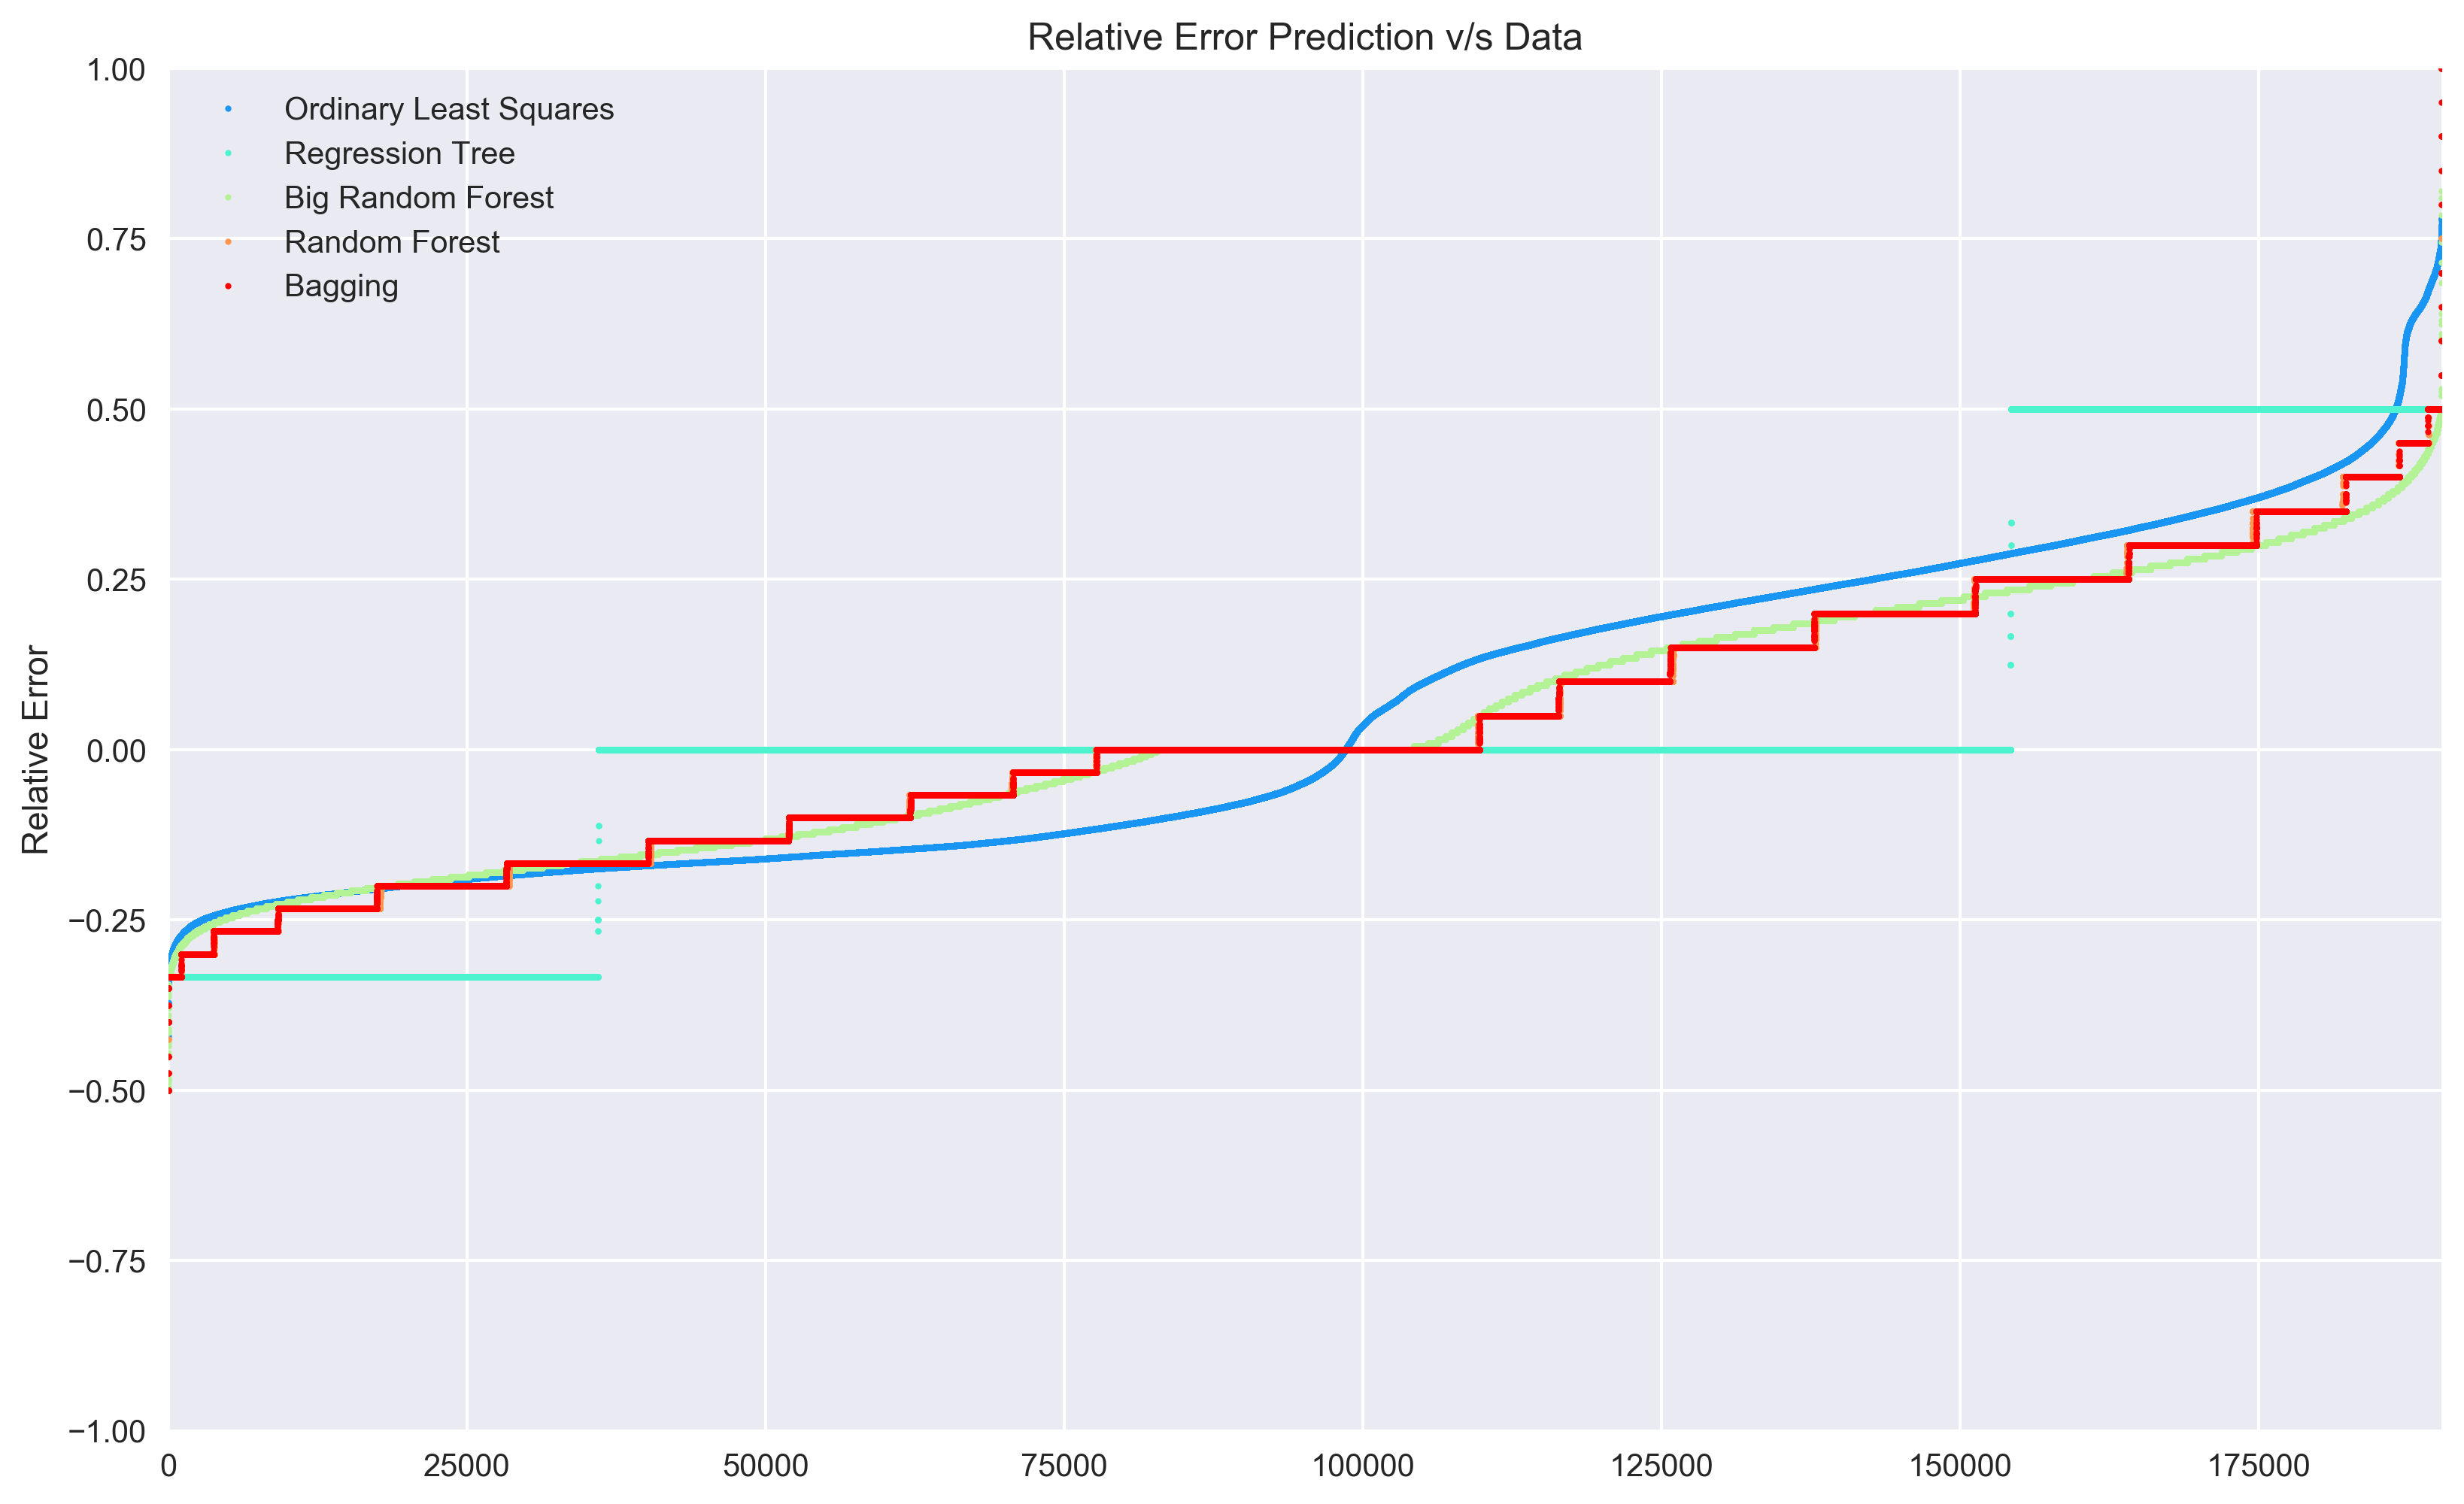

In [137]:
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
next(color)
plt.figure(figsize=(13,8),dpi=300)
for index, row in DataFrame(experiments).iterrows():
    relative_error = (row["Predictions"] - actuals) / (1 + abs(actuals))
    plt.plot(np.sort(relative_error),'o',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Relative Error Prediction v/s Data')
plt.ylabel('Relative Error')
plt.grid(True)
plt.legend()
plt.axis([0,len(actuals),-1,1])
plt.show()

In [138]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=df2_2014['Victim Sex'], 
                                        X=df2_2014.drop("Victim Sex", axis=1),
                                        cv=5).mean())

In [139]:
DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

,Results
Algorithm,
Ordinary Least Squares,0.232013
Regression Tree,0.018519
Big Random Forest,0.491843
Random Forest,0.449679
Bagging,0.447846


Again the best score for predicting Victims Sex is __Big Random Forest__

### Victim Age prediction ###

In [140]:
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [141]:
from sklearn.model_selection import train_test_split
[_.shape for _ in  train_test_split(df2_2014.drop("Victim Age", axis=1), 
                                    df2_2014["Victim Age"], test_size=0.25)]

[(142747, 8), (47583, 8), (142747,), (47583,)]

In [142]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(df2_2014.drop("Victim Age", axis=1), 
                         df2_2014["Victim Age"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pandas.Series(actuals)
experiments["Predictions"] = list(map(pandas.Series, experiments["Predictions"]))

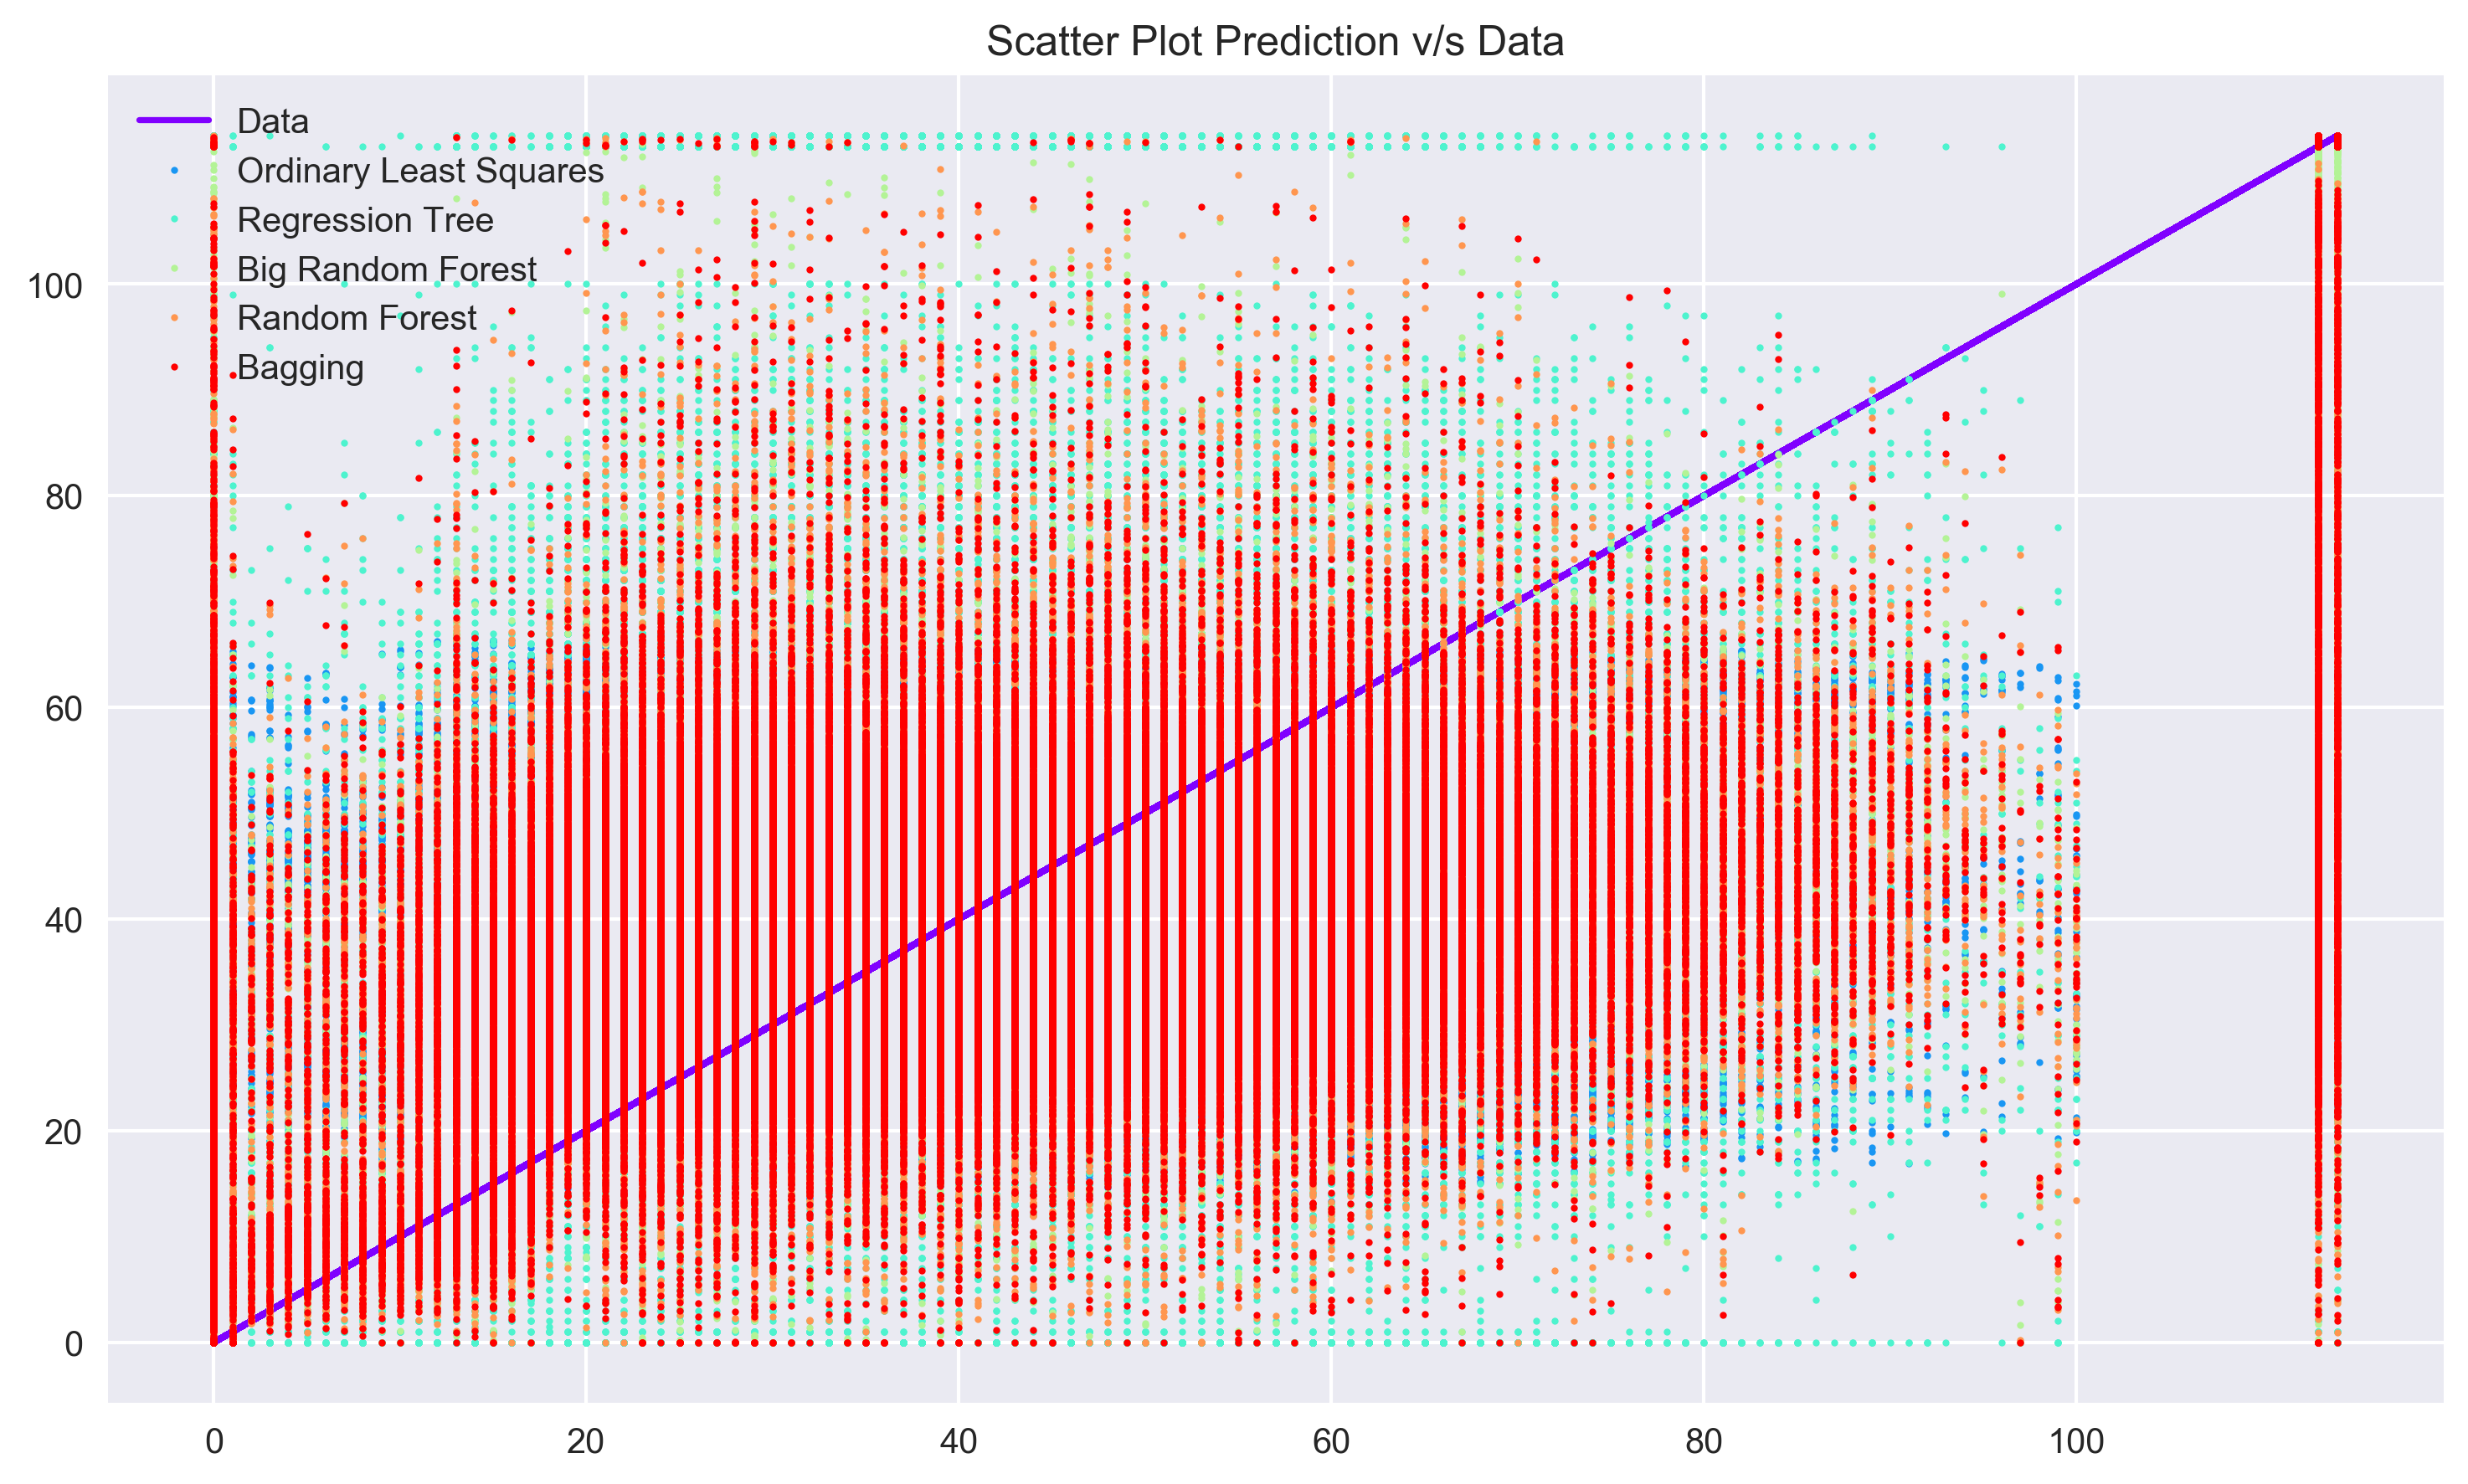

In [143]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
plt.figure(figsize=(12,7),dpi=300)
plt.plot(actuals,actuals,c=next(color),markersize=2,label='Data')
for _, row in DataFrame(experiments).iterrows():
    plt.plot(actuals, row["Predictions"],'o',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Scatter Plot Prediction v/s Data')
plt.grid(True)
plt.legend()
plt.show()

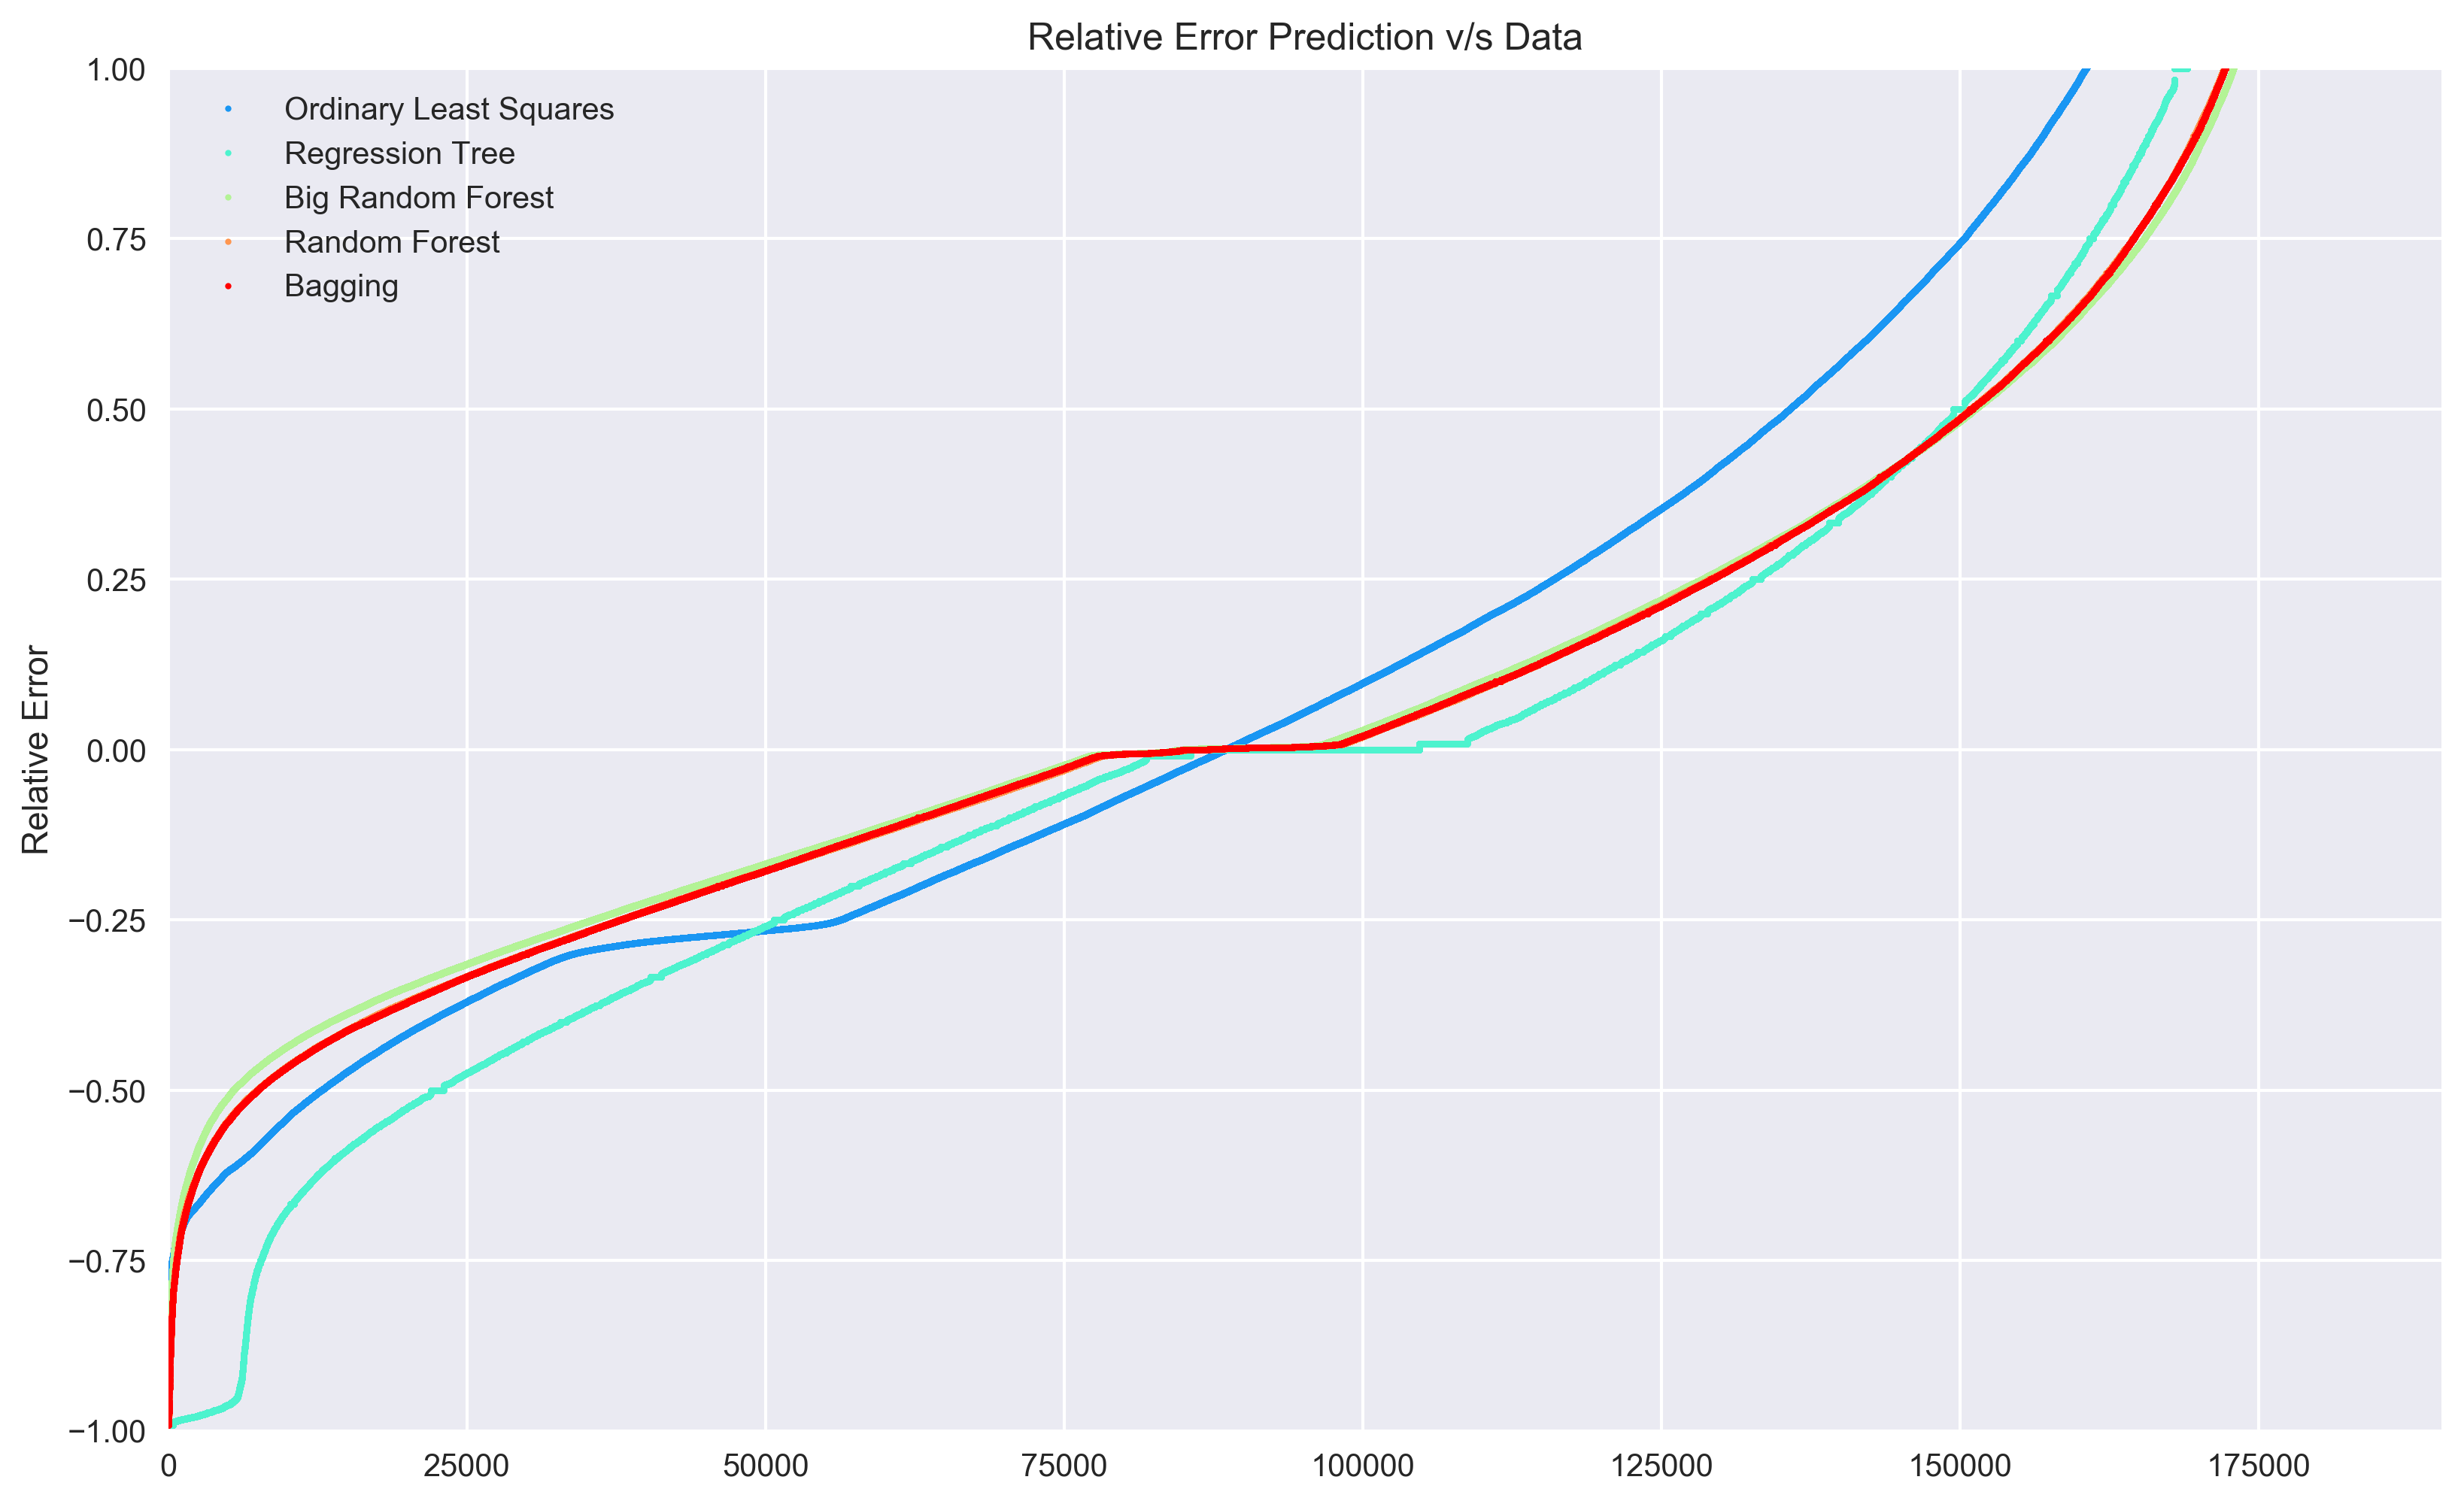

In [144]:
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
next(color)
plt.figure(figsize=(13,8),dpi=300)
for index, row in DataFrame(experiments).iterrows():
    relative_error = (row["Predictions"] - actuals) / (1 + abs(actuals))
    plt.plot(np.sort(relative_error),'o',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Relative Error Prediction v/s Data')
plt.ylabel('Relative Error')
plt.grid(True)
plt.legend()
plt.axis([0,len(actuals),-1,1])
plt.show()

In [145]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=df2_2014['Victim Age'], 
                                        X=df2_2014.drop("Victim Age", axis=1),
                                        cv=5).mean())

In [146]:
DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

,Results
Algorithm,
Ordinary Least Squares,0.288379
Regression Tree,0.142994
Big Random Forest,0.565028
Random Forest,0.520585
Bagging,0.523439


Again Big Random Forest is having the best score to predict the Victims Age.

__In total Big Random Forest algorithm is the best o be used for crime prediction and analysis__